In [140]:
import pandas
import json
import matplotlib
from matplotlib import pyplot
import seaborn as sns

### Start with basic game level analysis
This tells us that in our sample set of starter words `turns`, `times`, and `means` are the ones leading to lower number of turns to solve (using the word_freq method). We had previously found that `rates` was likely to reduce the number of possible remaining words the most, so it's somewhat surprising it isn't higher on the list.

Some randomness, or also something about these higher words that are making them perform better than other words that more dramatically reduce the number of possible remaining words

In [17]:
df_game = pandas.read_csv('./simulations/gamelog_wordfreq.csv')

In [18]:
df_game.groupby('first_guess').agg({'turns': 'mean'}).sort_values('turns', ascending=True)

,turns
first_guess,
taken,4.45
times,4.46
means,4.47
child,4.49
games,4.52
...,...
local,5.12
state,5.18
leave,5.21


In [19]:
# We have previously found rates to be the best word based on our model of word value 
df_game[df_game['first_guess'] == 'rates'].agg({'turns': 'mean'})

turns    4.72
dtype: float64

In [20]:
df_game.agg({'turns': ['mean', 'median']})

,turns
mean,4.814756
median,5.000000


<AxesSubplot:>

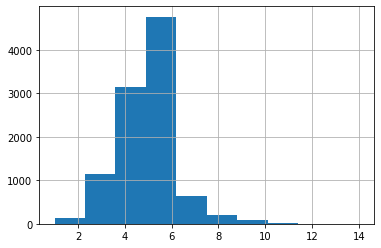

In [21]:
df_game['turns'].hist()

#### Now let's do turn level analysis

In [54]:
df_turn = pandas.read_csv('./simulations/turnlog_wordfreq.csv')

In [69]:
df_combined = df_turn.merge(df_game, on="game_id")

**Starting with which word most reduces the number of possible words on the second guess**
We see that this is `rates`! As my separate analysis suggested it should be. We'll need to dive in to know why rates

In [76]:
df_combined[df_combined['turn_number'] == 2].groupby('first_guess').agg({'words_possible': 'mean'}).sort_values('words_possible', ascending=True)

,words_possible
first_guess,
rates,1039.15
means,1286.27
later,1346.53
least,1385.57
taken,1423.24
...,...
every,6612.68
check,8627.34
known,8752.64


#### After added model by letter weight

In [8]:
df_game_modeled = pandas.read_csv('./simulations/gamelog_model.csv')

In [12]:
df_game_modeled.groupby('first_guess').agg({'turns': ['mean', 'count', 'median', 'std']}).sort_values(('turns', 'mean'), ascending=True).head(25)



turns                       
                 mean count median       std
first_guess                                 
great        4.376238   101    4.0  1.037800
heart        4.500000   100    4.5  1.123666
irate        4.510000   100    4.0  1.201808
aires        4.520000   100    4.0  1.158892
learn        4.520000   100    4.0  1.176195
least        4.530000   100    4.0  1.077361
rates        4.530000   100    4.0  1.226434
aster        4.530000   100    4.0  1.242797
einar        4.540000   100    4.0  1.381114
first        4.550000   100    4.0  1.250252
earns        4.550000   100    4.0  1.200799
earth        4.550000   100    5.0  1.057680
arles        4.550000   100    4.0  1.233988
their        4.570000   100    5.0  1.273308
raine        4.580000   100    5.0  1.256739
raise        4.580000   100    5.0  1.272713
stare        4.580000   100    4.0  1.215888
after        4.600000   100    4.0  1.294901
taser        4.600000   100    4.0  1.463357
those        4.600000   100    4.0  1.263313
arose        4.600000   100    4.0  1.543968
oates        4.610000   100    4.0  1.286252
eatin        4.620000   100    4.0  1.447952
later        4.620000   100    5.0  1.089713
share        4.630000   100    4.0  1.211519

In [13]:
df_game_modeled.agg({'turns': ['mean', 'median']})

,turns
mean,4.641991
median,4.000000


<AxesSubplot:>

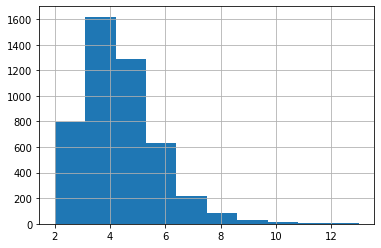

In [14]:
df_game_modeled['turns'].hist()

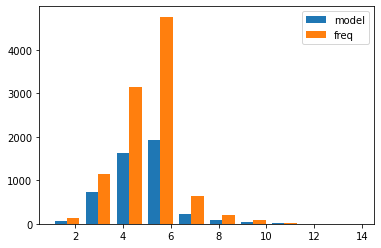

In [22]:
pyplot.hist([df_game_modeled['turns'],df_game['turns']], label=['model', 'freq'])
pyplot.legend(loc='upper right')
pyplot.show()

#### Adding letter position to model

In [40]:
df_game_model_pos = pandas.read_csv('./simulations/gamelog_model_with_perc.csv')

In [41]:
df_game_model_pos.groupby('first_guess').agg({'turns': ['mean', 'count', 'median', 'std']}).sort_values(('turns', 'mean'), ascending=True).head(25)

turns                       
             mean count median       std
first_guess                             
tears        4.10    20    4.0  1.119210
laser        4.15    20    4.0  1.089423
raise        4.35    20    4.0  1.386969
about        4.50    20    5.0  0.760886
later        4.50    20    4.0  1.235442
arent        4.50    20    5.0  1.235442
least        4.55    20    4.5  1.276302
after        4.55    20    5.0  1.099043
their        4.60    20    5.0  1.231174
oates        4.60    20    4.5  1.231174
earth        4.60    20    4.0  1.667018
aries        4.60    20    4.5  1.231174
earls        4.65    20    5.0  1.089423
taser        4.65    20    4.5  1.225819
great        4.65    20    4.0  1.424411
earns        4.70    20    4.5  1.719853
einar        4.70    20    4.0  1.657519
arose        4.70    20    4.0  1.559352
learn        4.75    20    4.5  2.149051
siena        4.80    20    4.0  1.935812
arles        4.80    20    4.0  1.704483
artie        4.85    20    5.0  1.268028
nears        4.85    20    4.0  2.230766
there        4.90    20    5.0  1.165287
eason        4.90    20    4.0  1.410487

In [42]:
df_game_model_pos.agg({'turns': ['mean', 'median']})

,turns
mean,4.912338
median,5.000000


#### Create simulations be various weights

In [2]:
from wordleSimulator import run_simulation

In [3]:
# Try different weights
starters = ['their', 'about', 'other', 'after', 'years', 'great', 'those', 'raise', 'there', 'rates',
            'later', 'arise', 'aires', 'aries', 'arose', 'tears', 'stare', 'artie', 'irate', 'taser', 'aster', 'least',
            'first', 'oates', 'share', 'heart', 'arnie', 'reina', 'raine', 'einar', 'irena', 'earns', 'snare', 'nears',
            'arent', 'siena', 'anise', 'eason', 'earth', 'laser', 'learn', 'eatin', 'ariel', 'eaton', 'earls', 'reals', 'arles']


In [4]:
import random

In [138]:
random.randint(0, 4)/4

0.5

In [23]:
for run_games in range(500):
    run_simulation(n_letters = 5, sims=1, game_log='./simulations/gamelog_model_greats.csv', turn_log='./simulations/turnlog_model_greats.csv',
               start_word = 'great', sort_on = 'model_rank', 
               model_params = {'freq': random.uniform(0,1), 'letter_score_by_word': random.uniform(0,1), 'letter_score_by_freq': random.uniform(0,1), 'distinct_letters': random.uniform(0,1)})
    

In [140]:
# run_simulation(n_letters = 5, sims=5, game_log='./simulations/gamelog_model_weights.csv', turn_log='./simulations/turnlog_model_weights.csv',
#                start_word = starters[random.randint(0, 46)], sort_on = 'model_rank', 
#                model_params = {'freq': random.randint(0, 4)/4, 'letter_score_by_word': random.randint(0, 4)/4, 'letter_score_by_freq': random.randint(0, 4)/4, 'distinct_letters': random.randint(0, 4)/4})

#### Calculating chance of guess being right

In [115]:
import numpy as np

In [248]:
df_turn = pandas.read_csv('./simulations/turnlog_same_final_word.csv')

In [249]:
df_turn.head(5)

,game_id,turn_number,guess,words_possible,letters_in,letters_out,pos_yes,pos_no,freq,letter_score_by_word,letter_score_by_freq,distinct_letters,letter_pos_score_by_word,letter_pos_score_by_freq,model_params,model_rank,response
0,03bc8c08c1875,1,vytas,38809,[],[],"[[], [], [], [], []]","[[], [], [], [], []]",0.000007,0.659429,0.625558,1.0,0.507093,0.353622,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",3.145709,____+
1,03bc8c08c1875,2,scops,2129,['s'],"['y', 'v', 'a', 't']","[[], [], [], [], ['s']]","[[], [], [], [], []]",0.000120,0.491831,0.480528,0.6,0.238921,0.277994,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",2.089394,-___+
2,03bc8c08c1875,3,neris,832,['s'],"['y', 'a', 'p', 'o', 'c', 'v', 't']","[[], [], [], [], ['s']]","[['s'], [], [], [], []]",0.000135,0.983382,0.933885,1.0,0.726705,0.528023,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",4.172129,_+__+
3,03bc8c08c1875,4,hemes,96,"['s', 'e']","['y', 'n', 'a', 'i', 'p', 'r', 'o', 'c', 'v', ...","[[], ['e'], [], [], ['s']]","[['s'], [], [], [], []]",0.000074,0.455556,0.462639,0.6,0.401255,0.058549,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",1.978073,_+_-+
4,03bc8c08c1875,5,feels,44,"['s', 'e']","['y', 'n', 'm', 'a', 'i', 'p', 'r', 'o', 'c', ...","[[], ['e'], [], [], ['s']]","[['s'], [], [], ['e'], []]",0.512861,0.627907,0.735557,0.6,0.406321,0.578721,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",3.461367,_+--+


In [255]:
len(pandas.unique(df_turn['game_id']))

5002

In [256]:
df_turn['last_guess'] = df_turn['response'] == '+++++'
df_turn['letter_in_count'] = (df_turn['letters_in'].apply(len)/5).apply(np.floor)
df_turn['letter_out_count'] = (df_turn['letters_out'].apply(len)/5).apply(np.floor)

In [259]:
df_turn.head(5)

,game_id,turn_number,guess,words_possible,letters_in,letters_out,pos_yes,pos_no,freq,letter_score_by_word,letter_score_by_freq,distinct_letters,letter_pos_score_by_word,letter_pos_score_by_freq,model_params,model_rank,response,last_guess,letter_in_count,letter_out_count
0,03bc8c08c1875,1,vytas,38809,[],[],"[[], [], [], [], []]","[[], [], [], [], []]",0.000007,0.659429,0.625558,1.0,0.507093,0.353622,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",3.145709,____+,False,0.0,0.0
1,03bc8c08c1875,2,scops,2129,['s'],"['y', 'v', 'a', 't']","[[], [], [], [], ['s']]","[[], [], [], [], []]",0.000120,0.491831,0.480528,0.6,0.238921,0.277994,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",2.089394,-___+,False,1.0,4.0
2,03bc8c08c1875,3,neris,832,['s'],"['y', 'a', 'p', 'o', 'c', 'v', 't']","[[], [], [], [], ['s']]","[['s'], [], [], [], []]",0.000135,0.983382,0.933885,1.0,0.726705,0.528023,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",4.172129,_+__+,False,1.0,7.0
3,03bc8c08c1875,4,hemes,96,"['s', 'e']","['y', 'n', 'a', 'i', 'p', 'r', 'o', 'c', 'v', ...","[[], ['e'], [], [], ['s']]","[['s'], [], [], [], []]",0.000074,0.455556,0.462639,0.6,0.401255,0.058549,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",1.978073,_+_-+,False,2.0,10.0
4,03bc8c08c1875,5,feels,44,"['s', 'e']","['y', 'n', 'm', 'a', 'i', 'p', 'r', 'o', 'c', ...","[[], ['e'], [], [], ['s']]","[['s'], [], [], ['e'], []]",0.512861,0.627907,0.735557,0.6,0.406321,0.578721,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",3.461367,_+--+,False,2.0,12.0


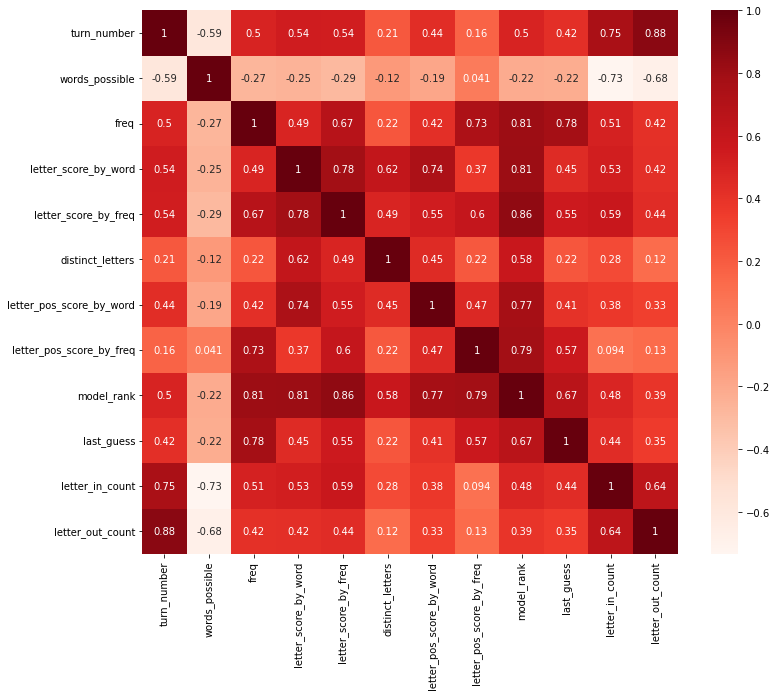

In [260]:
pyplot.figure(figsize=(12,10))
cor = df_turn.corr()
sns.heatmap(cor, annot=True, cmap=pyplot.cm.Reds)
pyplot.show()

In [301]:
features = df_turn[["turn_number", "words_possible", "freq", "letter_score_by_word", "letter_score_by_freq", "distinct_letters", "letter_pos_score_by_word", "letter_pos_score_by_freq", "letter_in_count", "letter_out_count"]]
target = df_turn['last_guess']

In [302]:
features

,turn_number,words_possible,freq,letter_score_by_word,letter_score_by_freq,distinct_letters,letter_pos_score_by_word,letter_pos_score_by_freq,letter_in_count,letter_out_count
0,1,38809,0.000007,0.659429,0.625558,1.0,0.507093,0.353622,0.0,0.0
1,2,2129,0.000120,0.491831,0.480528,0.6,0.238921,0.277994,1.0,4.0
2,3,832,0.000135,0.983382,0.933885,1.0,0.726705,0.528023,1.0,7.0
3,4,96,0.000074,0.455556,0.462639,0.6,0.401255,0.058549,2.0,10.0
4,5,44,0.512861,0.627907,0.735557,0.6,0.406321,0.578721,2.0,12.0
...,...,...,...,...,...,...,...,...,...,...
29952,4,10,0.301995,0.625000,0.848830,0.6,0.125000,0.301995,3.0,8.0
29953,1,38809,0.000005,0.592063,0.572420,1.0,0.502701,0.300148,0.0,0.0
29954,2,9865,0.000030,0.837993,0.765185,1.0,0.640504,0.456875,0.0,5.0
29955,3,65,0.003548,0.709677,0.747600,1.0,0.490646,0.370671,3.0,7.0


In [303]:
features.fillna(0,inplace=True)

/Users/jonkatzur/opt/miniconda3/envs/udacity/lib/python3.8/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [304]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)


In [305]:
from sklearn import linear_model
reg = linear_model.LogisticRegression()
reg.fit (feature_train, target_train)
print(f"Coefficient: {(reg.coef_)}")

Coefficient: [[-0.09013509 -0.00783395  4.18832592  3.06954012 -0.37703839  0.98812534
   0.17302944 -0.17188152  0.31325662  0.07978425]]


/Users/jonkatzur/opt/miniconda3/envs/udacity/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [306]:
print(f"Intecept: {reg.intercept_}")
print(f"R^2 in training of: {reg.score(feature_train,target_train)}")
print(f"R^2 in test of: {reg.score(feature_test,target_test)}")

Intecept: [-7.60180109]
R^2 in training of: 0.9393109894511951
R^2 in test of: 0.9356432338607383


In [307]:
print(f"-------------------------------")
reg.fit (feature_test, target_test)
print(f"Coefficient: {reg.coef_}")
print(f"Intecept: {reg.intercept_}")
print(f"R^2 in training of: {reg.score(feature_test,target_test)}")
print(f"R^2 in test of: {reg.score(feature_train,target_train)}")

-------------------------------
Coefficient: [[-1.22546456e-01 -2.31369957e-04  4.54099938e+00  1.26136096e+00
  -1.36538806e+00 -6.26496827e-01  1.34458376e+00 -4.62370315e-01
   6.96586172e-01  1.38480781e-01]]
Intecept: [-6.22554702]
R^2 in training of: 0.9342412711128913
R^2 in test of: 0.9375083455735078


/Users/jonkatzur/opt/miniconda3/envs/udacity/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [308]:
features.iloc[2]

turn_number                   3.000000
words_possible              832.000000
freq                          0.000135
letter_score_by_word          0.983382
letter_score_by_freq          0.933885
distinct_letters              1.000000
letter_pos_score_by_word      0.726705
letter_pos_score_by_freq      0.528023
letter_in_count               1.000000
letter_out_count              7.000000
Name: 2, dtype: float64

In [309]:
reg.predict_proba(features)[6]

array([0.14481953, 0.85518047])

#### Apply this model to new data

In [310]:
df_turn_new = pandas.read_csv('./simulations/turnlog_random_words_only.csv')

In [311]:
df_turn_new['last_guess'] = df_turn_new['response'] == '+++++'
df_turn_new['letter_in_count'] = (df_turn_new['letters_in'].apply(len)/5).apply(np.floor)
df_turn_new['letter_out_count'] = (df_turn_new['letters_out'].apply(len)/5).apply(np.floor)

In [312]:
features_new = df_turn_new[["turn_number", "words_possible", "freq", "letter_score_by_word", "letter_score_by_freq", "distinct_letters", "letter_pos_score_by_word", "letter_pos_score_by_freq", "letter_in_count", "letter_out_count"]]
target_new = df_turn_new['last_guess']



In [313]:
features_new.fillna(0,inplace=True)

/Users/jonkatzur/opt/miniconda3/envs/udacity/lib/python3.8/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [314]:
print(f"R^2 in test of: {reg.score(features_new,target_new)}")

R^2 in test of: 0.9355106100795756


In [320]:
reg.predict_proba(features_new)[6]

array([0.67198914, 0.32801086])

In [316]:
df_turn_new.iloc[6]

game_id                                                         0948b0b29f3b2
turn_number                                                                 7
guess                                                                   matey
words_possible                                                              2
letters_in                                               ['t', 'e', 'm', 'a']
letters_out                     ['i', 'o', 'u', 'r', 's', 'n', 'k', 'h', 'j']
pos_yes                                      [['m'], ['a'], ['t'], ['e'], []]
pos_no                                     [[], ['e'], [], ['a'], ['e', 'a']]
freq                                                                 0.380189
letter_score_by_word                                                      1.0
letter_score_by_freq                                                 0.876038
distinct_letters                                                          1.0
letter_pos_score_by_word                                        

#### Estimating how much we'll reduce number of possibilities

In [228]:
df_turn['word_ratio'] = (df_turn['words_possible'].shift(-1) / df_turn['words_possible']).apply(lambda l: l if l < 1 else None)

In [231]:
df_turn.drop_na()

,game_id,turn_number,guess,words_possible,letters_in,letters_out,pos_yes,pos_no,freq,letter_score_by_word,...,distinct_letters,letter_pos_score_by_word,letter_pos_score_by_freq,model_params,model_rank,response,last_guess,letter_in_count,letter_out_count,word_ratio
0,03bc8c08c1875,1,vytas,38809,[],[],"[[], [], [], [], []]","[[], [], [], [], []]",0.000007,0.659429,...,1.0,0.507093,0.353622,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",3.145709,____+,False,0.0,0.0,0.054858
1,03bc8c08c1875,2,scops,2129,['s'],"['y', 'v', 'a', 't']","[[], [], [], [], ['s']]","[[], [], [], [], []]",0.000120,0.491831,...,0.6,0.238921,0.277994,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",2.089394,-___+,False,1.0,4.0,0.390794
2,03bc8c08c1875,3,neris,832,['s'],"['y', 'a', 'p', 'o', 'c', 'v', 't']","[[], [], [], [], ['s']]","[['s'], [], [], [], []]",0.000135,0.983382,...,1.0,0.726705,0.528023,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",4.172129,_+__+,False,1.0,7.0,0.115385
3,03bc8c08c1875,4,hemes,96,"['s', 'e']","['y', 'n', 'a', 'i', 'p', 'r', 'o', 'c', 'v', ...","[[], ['e'], [], [], ['s']]","[['s'], [], [], [], []]",0.000074,0.455556,...,0.6,0.401255,0.058549,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",1.978073,_+_-+,False,2.0,10.0,0.458333
4,03bc8c08c1875,5,feels,44,"['s', 'e']","['y', 'n', 'm', 'a', 'i', 'p', 'r', 'o', 'c', ...","[[], ['e'], [], [], ['s']]","[['s'], [], [], ['e'], []]",0.512861,0.627907,...,0.6,0.406321,0.578721,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",3.461367,_+--+,False,2.0,12.0,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,3284852693ee9f,5,veliz,20,"['l', 'e', 'i']","['á', 'o', 'm', 'n', 'h', 'd', 'a', 'c', 'y']","[[], ['e'], ['l'], ['i'], []]","[['e'], ['l'], ['i'], ['e'], ['i']]",0.002512,0.846154,...,1.0,0.634146,0.040317,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",3.132836,_+++_,False,3.0,9.0,0.650000
6190,3284852693ee9f,6,felix,13,"['l', 'e', 'i']","['á', 'o', 'm', 'n', 'h', 'd', 'v', 'z', 'a', ...","[[], ['e'], ['l'], ['i'], []]","[['e'], ['l'], ['i'], ['e'], ['i']]",1.000000,0.727273,...,1.0,0.694118,1.000000,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",5.421390,_+++_,False,3.0,11.0,0.692308
6191,3284852693ee9f,7,gelis,9,"['l', 'e', 'i']","['á', 'o', 'm', 'x', 'n', 'h', 'd', 'v', 'f', ...","[[], ['e'], ['l'], ['i'], []]","[['e'], ['l'], ['i'], ['e'], ['i']]",0.048978,1.000000,...,1.0,0.871795,0.294000,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",4.214773,_++++,False,3.0,13.0,0.222222
6192,3284852693ee9f,8,telis,2,"['l', 's', 'e', 'i']","['g', 'á', 'o', 'm', 'x', 'n', 'h', 'd', 'v', ...","[[], ['e'], ['l'], ['i'], ['s']]","[['e'], ['l'], ['i'], ['e'], ['i']]",0.091201,1.000000,...,1.0,1.000000,0.091201,"{'freq': 1, 'letter_score_by_word': 1, 'letter...",4.000642,_++++,False,4.0,14.0,0.500000


In [236]:
features = df_turn[["words_possible", "freq", "letter_score_by_word", "letter_score_by_freq", "distinct_letters", "letter_pos_score_by_word", "letter_pos_score_by_freq", "model_rank", "letter_in_count", "letter_out_count"]]
target = df_turn['word_ratio']
features.fillna(0,inplace=True)
target.fillna(0,inplace=True)

/Users/jonkatzur/opt/miniconda3/envs/udacity/lib/python3.8/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [237]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

reg = linear_model.LinearRegression()
reg.fit (feature_train, target_train)


LinearRegression()

In [238]:
print(f"Coefficient: {(reg.coef_)}")
print(f"Intecept: {reg.intercept_}")
print(f"R^2 in training of: {reg.score(feature_train,target_train)}")
print(f"R^2 in test of: {reg.score(feature_test,target_test)}")

Coefficient: [ 4.89902494e-06 -2.85984747e-01 -1.61320077e-01 -1.97937135e-02
 -1.29435579e-01  1.00184054e-01 -2.42312238e-01  5.53333969e-02
  1.13093573e-01  1.58647569e-02]
Intecept: 0.019792617303999893
R^2 in training of: 0.35324901295915345
R^2 in test of: 0.36011329129046377


In [239]:
print(f"-------------------------------")
reg.fit (feature_test, target_test)
print(f"Coefficient: {reg.coef_}")
print(f"Intecept: {reg.intercept_}")
print(f"R^2 in training of: {reg.score(feature_test,target_test)}")
print(f"R^2 in test of: {reg.score(feature_train,target_train)}")

-------------------------------
Coefficient: [ 4.40063580e-06 -2.85709573e-01 -1.47425924e-01 -5.29674434e-02
 -1.04535492e-01  1.18962806e-01 -2.30947195e-01  5.35564886e-02
  1.12081882e-01  1.60276857e-02]
Intecept: 0.0060811599680208606
R^2 in training of: 0.361640990282714
R^2 in test of: 0.351646202286915


In [247]:
reg.predict(features)[4]

0.18205137853867906